In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]) 
# Read Images
img = rgb2gray(mpimg.imread('cmp2_2_1.jpg'))

# Output Images
plt.figure(figsize=(10,20))
plt.imshow(img,cmap=plt.get_cmap('gray'))

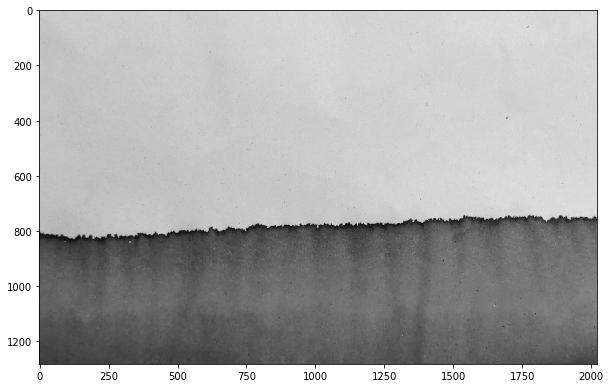

In [2]:
img1=img[:,200:int(-img.shape[1]/20)]
plt.figure(figsize=(10,20))
plt.imshow(img1,cmap=plt.get_cmap('gray'))

In [3]:
dif=0
for i in range(600,900):
    if (img1[i-1,0]-img1[i,0])>dif : dif,yval=img1[i-1,0]-img1[i,0],i
yvals=[yval]
for j in range(1,img1.shape[1]):
    dif=0
    for i in range(600,900):
        if (img1[i-1,j]-img1[i,j])>dif and i<yvals[-1]+20 and i>yvals[-1]-20: dif,yval=img1[i-1,j]-img1[i,j],i
    yvals.append(yval)

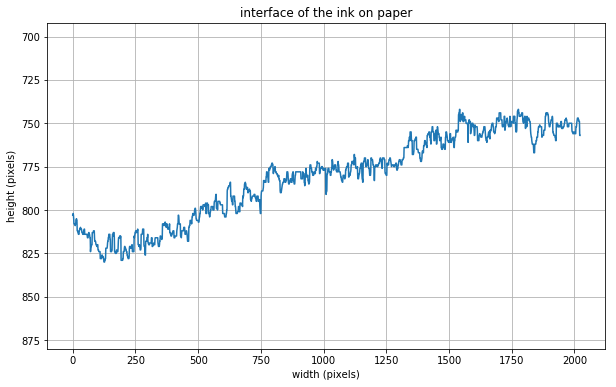

In [4]:
plt.figure(figsize=(10,6))
plt.ylim(max(yvals)+50, min(yvals)-50)
plt.title('interface of the ink on paper')
plt.ylabel('height (pixels)')
plt.xlabel('width (pixels)')
plt.grid()
plt.plot(yvals)

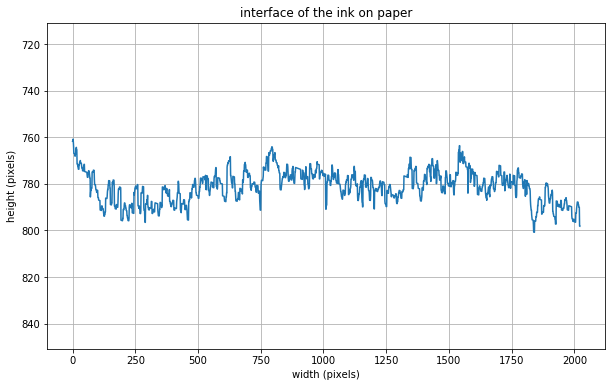

In [5]:
x=range(len(yvals))
coefficients1 = np.polyfit(x, yvals, 1)
polynomial1 = np.poly1d(coefficients1)

yvals=yvals+polynomial1(len(yvals)/2)-polynomial1(x)
plt.figure(figsize=(10,6))
plt.ylim(max(yvals)+50, min(yvals)-50)
plt.title('interface of the ink on paper')
plt.ylabel('height (pixels)')
plt.xlabel('width (pixels)')
plt.grid()
plt.plot(yvals)

In [6]:
coefficients1

array([-4.07760598e-02,  8.22428749e+02])

In [7]:
def corr(arr):
    df=[]
    for i in range(1,int(len(arr)/10)):
        df.append(np.sqrt(np.mean((arr[i:]-arr[:-i])**2)))
    return df

12:27  :  12:31, 12:34 : 12:50  , 12:52 : 13:04 , 13:05 : 13:18, 13:19  :  

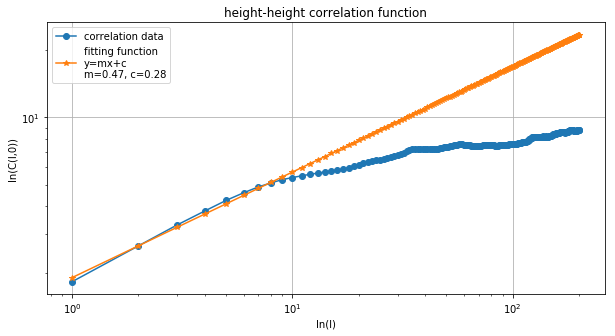

In [9]:
y=corr(np.array(yvals))
x=range(1,len(y)+1)
y1=y[:int(len(y)/20)]
x1=range(1,len(y1)+1)
coefficients = np.polyfit(np.log10(x1), np.log10(y1), 1)
polynomial = np.poly1d(coefficients)
log10_y_fit = polynomial(np.log10(x))
plt.figure(figsize=(10,5))
plt.plot(x, y, 'o-', label='correlation data')
plt.plot(x, 10**log10_y_fit, '*-',label='fitting function\ny=mx+c\nm=0.47, c=0.28')
plt.title('height-height correlation function')
plt.grid()
plt.ylabel('ln(C(l,0))')
plt.xlabel('ln(l)')
plt.yscale('log')
plt.legend()
plt.xscale('log')

In [158]:
coefficients

array([0.47301066, 0.28231055])